# Numpy 笔记(一)

## 1.1 导入

使用numpy需要导入numpy模块, 如下：

In [1]:
import numpy as np

## 1.2 创建numpy数组

有很多种创建numpy数组的方法，例如：
- 使用tuple
- 使用list
- 使用numpy提供的函数
- 从文件中读取数据

### 1.2.1 使用tuple创建numpy数组
我们可以使用numpy的**array**函数和python中的**tuple**来创建numpy数组.

In [2]:
# 构造一个一维的numpy数组, 传入的参数t是一个tuple
t = (2,3)
vec = np.array(t)
vec

array([2, 3])

In [3]:
# 构造一个二维的numpy数组, 传入的参数t是一个嵌套的tuple
t = ((1,2,3),(4,5,6))
mtrx = np.array(t)
mtrx

array([[1, 2, 3],
       [4, 5, 6]])

我们可以使用python中的**type**函数来查看一个变量的类型:

In [4]:
print(type(vec))
print(type(mtrx))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


我们可以看到, 通过上面创建的两个变量都是numpy.ndarray类型. 不同的是它们的维度, 一个是一维的, 一个是二维的. 我们可以使用numpy数组的**ndim**属性来查看维度.

In [5]:
print(vec.ndim)
print(mtrx.ndim)

1
2


In [6]:
mtrx

array([[1, 2, 3],
       [4, 5, 6]])

这是刚才我们创建的一个二维的numpy数组, 可以把它看成一个$2\times3$的矩阵. 假设在我们创建的时候, 不小心写成了:

In [7]:
# 第二个少写了一个6
t = ((1,2,3), (4,5))
vec = np.array(t)
vec

array([(1, 2, 3), (4, 5)], dtype=object)

我们本意是想创建一个$2\times3$的矩阵, 但由于粗心输错了. 这时候numpy并不会报错, 它会将(1,2,3)看成一个元素, (4,5)看成一个元素, 创建一个包含两个元素的向量. 这两个元素都是tuple类型, 第一个元素是(1,2,3), 第二个元素是(4,5). 上面输出结果中的dtype就代表了组成该numpy数组的元素的类型. 在这个例子中, 组成该向量的元素为一个python中的tuple, 在numpy中它是object类型. 我们也可以使用python中的type方法看一下元素在python中是什么类型.

In [8]:
print(type(vec[0]))
print(type(vec[1]))

<class 'tuple'>
<class 'tuple'>


从上面的例子我们也发现了, numpy数组中的所有元素必须是同一数据类型dtype. 

In [9]:
mtrx

array([[1, 2, 3],
       [4, 5, 6]])

我们来看看这个mtrx中元素的类型:

In [10]:
# 64位整型
mtrx.dtype

dtype('int64')

若在构造矩阵时, 输入的类型不一致, 则numpy可对其进行数据类型转换, 例如:

In [11]:
# 同时包含了字符和数字
t = ((1,2,"a"),(4,5,6))
mtrx = np.array(t)
print(mtrx)

[['1' '2' 'a']
 ['4' '5' '6']]


我们可以在构造矩阵时传入dtype参数, 用来指定该矩阵元素的类型:

In [12]:
mtrx = np.array([[1,2,3], [4,5,6]], dtype=float)
mtrx

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

一些常见的数据类型都可以用在dtype: int, float, complex, bool, object等等。
我们也可以指定数据类型的位数大小：int16, int32, int16, float128, complex128. 例如:

In [13]:
mtrx = np.array([[1,2,3], [4,5,6]], dtype="int16")
mtrx

array([[1, 2, 3],
       [4, 5, 6]], dtype=int16)

如果我们将numpy数组某一元素赋值一个不一致类型的值, 则会报ValueError错误. 例如, 我们将上面矩阵的第一行第一列的元素赋值为"a":

In [14]:
mtrx[0,0] = "a"

ValueError: invalid literal for int() with base 10: 'a'

我们也可以使用**np.astype**来改变某一数组的dtype.

In [15]:
mtrx_float = mtrx.astype(float)
print(mtrx_float)
print(mtrx_float.dtype)

[[ 1.  2.  3.]
 [ 4.  5.  6.]]
float64


### 1.2.2 使用list创建numpy数组
除了tuple, 我们还可以使用python中的**list**来构造向量或矩阵。

In [16]:
# 构造一个一维的numpy数组, 传入的参数li是一个list
li = [1,2,3,4]
vec = np.array(li)
vec

array([1, 2, 3, 4])

In [17]:
# 构造一个二维的numpy数组, 传入的参数li是一个嵌套的list
li = [[1, 2, 3], [2, 3, 4]]
mtrx = np.array(li)
mtrx

array([[1, 2, 3],
       [2, 3, 4]])

上一小节我们介绍了numpy数组的一些属性和相关函数, 这一小节再介绍几个.  
对于一个numpy数组来说, 我们可以使用它的**shape**属性来查看行列数:

In [18]:
mtrx.shape

(2, 3)

或者使用numpy的**shape**函数来查看:

In [19]:
print(np.shape(mtrx))

(2, 3)


从结果可以看出, 这是一个2行3列的numpy数组. 而对于一个一维的numpy数组:

In [20]:
vec

array([1, 2, 3, 4])

In [21]:
print(vec.shape)

(4,)


numpy数组还有一个**size**属性, 表示该数组的元素个数. 

In [22]:
print(mtrx.size)

6


可以使用**itemsize**查看每个元素所占空间(bytes):

In [23]:
mtrx.itemsize

8

### 1.2.3 使用numpy提供的函数生成矩阵
由于前面的方法需要我们手动输入numpy数组的元素所以只适用于构造比较小的矩阵. 如果想要构造比较大的矩阵, 使用前面的方法就太低效了. 还好numpy提供了一些函数, 利用这些函数我们可以快速的构造不同形式的矩阵.

#### identity
可以用它来快速生成单位阵.

In [24]:
np.identity(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

可以使用dtype指定元素类型:

In [25]:
np.identity(3, dtype=int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

#### zeros & ones

In [26]:
np.ones((3,3), dtype=int)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [27]:
np.zeros((5,), dtype=int)

array([0, 0, 0, 0, 0])

#### full

In [28]:
np.full((3,3), 9, dtype=int)

array([[9, 9, 9],
       [9, 9, 9],
       [9, 9, 9]])

#### arange

第一个参数为起始位置(默认为0), 第二个参数为结束位置(不包含), 第三个参数为跨度(默认为1).

In [29]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

跨度也可以使用小数

In [32]:
np.arange(1, 5, 0.5)

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

#### linspace

第一个参数为起始位置, 第二个参数为结束位置(包含), 第三个参数为总元素个数.

In [33]:
np.linspace(0, 10, num=10)

array([  0.        ,   1.11111111,   2.22222222,   3.33333333,
         4.44444444,   5.55555556,   6.66666667,   7.77777778,
         8.88888889,  10.        ])

参数endpoint默认为False, 当其为true时, 结果如下:

In [34]:
np.linspace(0, 10, num=10, endpoint=False)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

这个函数稍微复杂一点, 可以看一下官方文档:[numpy.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace)

#### logspace

刚才的linspace得到的各个元素之间是均匀增长的, 而logspace是指数增长的, 他需要第四个参数base(底数). 举个例子就好理解了:

In [35]:
np.linspace(1, 5, num=5)

array([ 1.,  2.,  3.,  4.,  5.])

In [36]:
np.logspace(1, 5, num=5, base=2)

array([  2.,   4.,   8.,  16.,  32.])

#### rand

In [37]:
from numpy import random

每个元素为[0,1]随机数

In [38]:
random.rand(3,3)

array([[ 0.34612509,  0.53905456,  0.99622775],
       [ 0.38991897,  0.79961696,  0.47791316],
       [ 0.8358235 ,  0.12609464,  0.28915152]])

#### rand
服从标准正态分布的随机数

In [39]:
random.randn(3,3)

array([[ 1.1018204 ,  1.24969459,  1.29254644],
       [ 0.83733605, -1.57932652,  1.37396366],
       [ 0.54369327,  0.15874077, -0.68713181]])

可以将生成的数据的分布画出来:

/Users/bobo/anaconda/envs/Python3.5/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


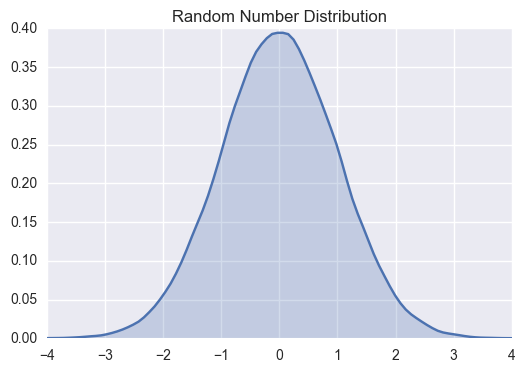

In [40]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.kdeplot(np.random.randn(100000), shade=True)
sns.despine(right=True, top=True)
sns.set_style("white")
plt.xlim(-4, 4)
plt.title("Random Number Distribution")
plt.show()

#### diag

指定对角线元素

In [41]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

可以使用参数k来设定偏移量:

In [42]:
np.diag([1,2,3], k=1)

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

In [43]:
np.diag([1,2,3], k=-2)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0]])

### 1.2.4 从文件中读取数据

这一节我们使用NBA火箭队球员詹姆斯$\bullet$哈登2009-2010赛季至本赛季的相关数据来作为例子讲解.数据我是从官网整理的(2016.12.07). 我们先来使用shell命令来查看一下文件. (在ipython中使用shell命令, 命令前要加上!)

In [44]:
!ls data

JamesHarden.csv   random-matrix.csv


使用head命令查看该文件内容:

In [45]:
!head data/JamesHarden.csv









22.9,9.9,40.3,37.5,80.8,3.2,1.8,1.4,1.1,0.3

这是本赛季截至2016.12.07的数据:    

|上场时间|得分|投篮命中率%|三分命中率%|罚球命中率%|篮板|助攻|失误|抢断|盖帽| 
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|37.1|28.7|44.7|35.3|84.4|7.6|11.6|5.7|1.4|0.3|

数据文件处理好之后, 我们需要读取它. 可以使用numpy中的**genfromtxt**函数来读取数据(csv文件分隔符为逗号):

In [46]:
data = np.genfromtxt("data/JamesHarden.csv", delimiter=",")

查看一下数据的行列数:

In [47]:
data.shape

(9, 10)

哈登是09年加入联盟, 到目前为止是它的第八个赛季, 加上第一行一共9行. 我们在来具体的看一下数据内容:

In [48]:
print(data)

[[  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]
 [ 37.1  28.7  44.7  35.3  84.4   7.6  11.6   5.7   1.4   0.3]
 [ 38.1  29.   43.9  35.9  86.    6.1   7.5   4.6   1.7   0.6]
 [ 36.8  27.4  44.   37.5  86.8   5.7   7.    4.    1.9   0.7]
 [ 38.   25.4  45.6  36.6  86.6   4.7   6.1   3.6   1.6   0.4]
 [ 38.3  25.9  43.8  36.8  85.1   4.9   5.8   3.8   1.8   0.5]
 [ 31.4  16.8  49.1  39.   84.6   4.1   3.7   2.2   1.    0.2]
 [ 26.7  12.2  43.6  34.9  84.3   3.1   2.1   1.3   1.1   0.3]
 [ 22.9   9.9  40.3  37.5  80.8   3.2   1.8   1.4   1.1   0.3]]


我们发现第一行竟然全变成了nan, 之前说了ndarray元素必须是同一数据类型. 这里numpy试图把所有的值都转成浮点型, 但是第一行无法转成浮点型, 就变成了nan. nan是not a number的缩写. 我们查看一下元素类型:

In [49]:
data.dtype

dtype('float64')

我们可以利用切片来除去第一行的内容:

In [50]:
data = data[1:]

In [51]:
print(data)

[[ 37.1  28.7  44.7  35.3  84.4   7.6  11.6   5.7   1.4   0.3]
 [ 38.1  29.   43.9  35.9  86.    6.1   7.5   4.6   1.7   0.6]
 [ 36.8  27.4  44.   37.5  86.8   5.7   7.    4.    1.9   0.7]
 [ 38.   25.4  45.6  36.6  86.6   4.7   6.1   3.6   1.6   0.4]
 [ 38.3  25.9  43.8  36.8  85.1   4.9   5.8   3.8   1.8   0.5]
 [ 31.4  16.8  49.1  39.   84.6   4.1   3.7   2.2   1.    0.2]
 [ 26.7  12.2  43.6  34.9  84.3   3.1   2.1   1.3   1.1   0.3]
 [ 22.9   9.9  40.3  37.5  80.8   3.2   1.8   1.4   1.1   0.3]]


这时候我们的数据已经读取成功了. 下面我们来对某些数据稍微可视化一下, 这里需要用到matplotlib.(笔记见这里:[matplotlib笔记](#))

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

现在我们想看一下哈登从新秀赛季到本赛季的场均得分变化的情况.  
首先获取得分数据:

In [53]:
points = data[:,0]
print(points)

[ 37.1  38.1  36.8  38.   38.3  31.4  26.7  22.9]


此时的数据是从本赛季到09赛季, 所以先要把它倒过来.(参考:[Most efficient way to reverse a numpy array](http://stackoverflow.com/questions/6771428/most-efficient-way-to-reverse-a-numpy-array), [Basic Slicing and Indexing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)).

In [54]:
points = points[::-1]
print(points)

[ 22.9  26.7  31.4  38.3  38.   36.8  38.1  37.1]


并且, 画折线图的时候, 横坐标是连续的数值, 需要将其转换成离散的字符串(参考:[plot with custom text for x axis points](http://stackoverflow.com/questions/3100985/plot-with-custom-text-for-x-axis-points)).  (后面学了pandas就比较简单了)

In [55]:
date = ["2009-2010", "2010-2011", "2011-2012", "2012-2013", "2013-2014", "2014-2015", "2015-2016", "2016-2017"]

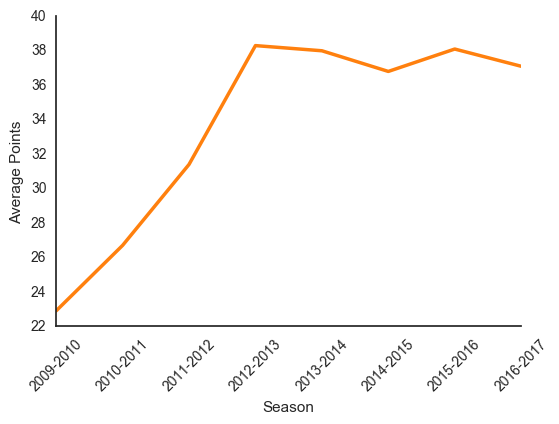

In [56]:
x = [0,1,2,3,4,5,6,7]
_, ax = plt.subplots()
ax.plot(x, points, linewidth=2.5, c=(255/255, 128/255, 14/255))
ax.set_xlabel("Season")
ax.set_ylabel("Average Points")
ax.tick_params(right="off", left="off", top="off")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xticks(x, date)
plt.xticks(rotation=45)
plt.show()

从上图看出, 从新秀赛季开始的四个赛季, 场均得分飙升. 特别是12-13赛季, 场均得分上升最快的一年. 到后面就趋于稳定了. (2012年哈登从雷霆被交易到火箭, 从最佳第六人变成老大.)  
再来看一个助攻的数据.

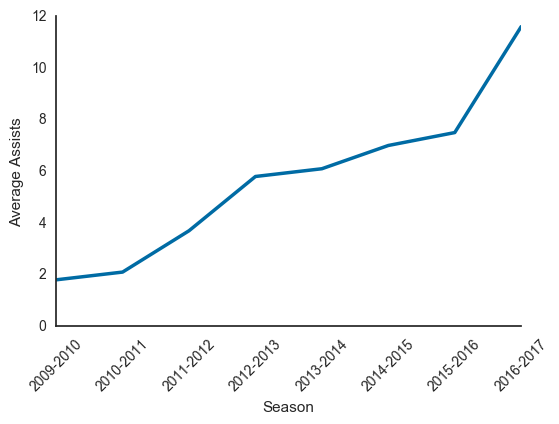

In [57]:
assists = data[:,6][::-1]
x = [0,1,2,3,4,5,6,7]
_, ax = plt.subplots()
ax.plot(x, assists, linewidth=2.5, c=(0/255, 107/255, 164/255))
ax.set_xlabel("Season")
ax.set_ylabel("Average Assists")
ax.tick_params(right="off", left="off", top="off")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xticks(x, date)
plt.xticks(rotation=45)
plt.show()

本赛季哈登最大的变化就是助攻了, 目前(2016.12.07)场均助攻领跑全联盟.

### 1.2.5 将数据保存到文件

numpy可以从文件中读取数据, 也可以把数据保存到文件.

In [58]:
mtrx = random.rand(5,5)
mtrx

array([[ 0.4355682 ,  0.92184727,  0.91747487,  0.71742377,  0.8328589 ],
       [ 0.08408132,  0.28059624,  0.81364453,  0.37545979,  0.73125637],
       [ 0.29294604,  0.3413473 ,  0.67972472,  0.79955549,  0.05073635],
       [ 0.82716461,  0.09079051,  0.02130069,  0.78361218,  0.79617351],
       [ 0.8457681 ,  0.16900443,  0.25292913,  0.59332786,  0.52616131]])

In [59]:
np.savetxt("data/random-matrix.csv", mtrx, fmt="%.8f")

查看保存的数据:

In [60]:
!ls data/

JamesHarden.csv   random-matrix.csv


In [61]:
!head data/random-matrix.csv

0.43556820 0.92184727 0.91747487 0.71742377 0.83285890
0.08408132 0.28059624 0.81364453 0.37545979 0.73125637
0.29294604 0.34134730 0.67972472 0.79955549 0.05073635
0.82716461 0.09079051 0.02130069 0.78361218 0.79617351
0.84576810 0.16900443 0.25292913 0.59332786 0.52616131
